In [1]:
import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

from training.src.data_loader import MaderAppDataset

In [3]:
training_data = MaderAppDataset(img_dir="../training/src/data", img_size=500)
train_dataloader = DataLoader(training_data, batch_size=16, shuffle=True)

In [4]:
images = next(iter(train_dataloader))
train_features, train_labels = images["image"], images["label"]
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

Feature batch shape: torch.Size([16, 3, 500, 500])
Labels batch shape: torch.Size([16])


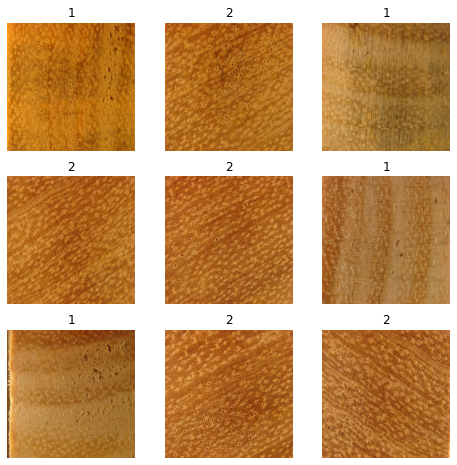

In [5]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    images = training_data[sample_idx]
    train_features, train_labels = images["image"], images["label"]    
    figure.add_subplot(rows, cols, i)
    img = train_features.squeeze().permute(1,2,0)
    plt.title(train_labels)
    plt.axis("off")
    plt.imshow(img)
plt.show()